**1.	Define the purpose of data analysis for the chosen dataset**


The purpose of analyzing the EV charging dataset is to learn more about how people use electric vehicle (EV) chargers and how much energy they consume. This analysis will help us understand how things like charging time, charging speed, and distance driven affect energy use. It will also look at the differences in charging habits between different types of users and chargers.

The goal is to make energy use more efficient by studying patterns in energy consumption, which can help plan better charging stations and manage energy more wisely. We will also create models to predict how much energy is needed based on important factors like charging time and speed.
By grouping similar charging sessions, we can find patterns and suggest ways to improve.

Lastly, we will test ideas to see if certain things, like charging speed, are connected to energy use. This analysis will give useful information to EV companies, charging station managers, and others to make EV charging better and easier for everyone.

**2. Identify and Justify the type of programming used for data analysis**


For this project, we're using Python because it’s good for working with data. Python has tools that help us organize, clean, and analyse the data easily. With tools like Pandas, we can sort and manage the data, NumPy helps us with math calculations, and Matplotlib and Seaborn let us create charts and graphs to see patterns more clearly. Plus, Python has scikit-learn, which helps us build models to predict things like energy use, cost, and charging habits.

Python is a popular choice because its code is simple to read and understand. It lets us do everything we need for this project in one place
from managing the data to building graphs and models. This makes Python the perfect choice for understanding our EV charging data better.



**3.	Identify the type and purpose of the machine learning algorithm to be implemented for the chosen dataset**


The machine learning algorithms used for the EV charging dataset include regression, classification, and clustering, and each has a specific job.
Regression models, like Linear Regression, help predict how much energy will be used (Energy Consumed (kWh)) based on factors like Charging Duration, Charging Rate, and Distance Driven. This helps in planning and managing energy resources better. Classification algorithms, such as Logistic Regression, K-Nearest Neighbours (KNN), Naive Bayes, and Decision Trees, are used to figure out if the energy consumed is above or below the middle value (median). This helps identify charging sessions that use a lot of or very little energy and gives useful insights into charging habits. Clustering techniques, like K-Means and Hierarchical Clustering,
group similar charging sessions or users based on patterns in data like Charging Duration and Charging Rate. These groups, or clusters, can help design better services and plan charging stations for different types of users.

These algorithms work together to predict energy needs, understand charging behaviour, and make EV charging smarter and more efficient.


**4. Identify and Justify the independent and dependent variables for the chosen dataset**

In the EV charging dataset, the dependent variable is Energy Consumed (kWh) because the goal is to figure out how much energy is used based on other factors.

The independent variables include Charging Duration (hours), which shows how long the vehicle was charged and directly affects energy use.
Another important variable is Charging Rate (kW), which tells how fast the energy is delivered and impacts the total energy consumed.
The Distance Driven (since last charge) (km) is also important because it shows how far the car traveled before charging, which can affect how much energy is needed.

Additionally, User Type (like personal or commercial users) and Charger Type (like fast or slow chargers) are included because they can change the way charging happens.
These variables are chosen because they help explain and predict energy use during EV charging.


**5. Justify why you want to perform the descriptive analysis for the chosen dataset.**

Descriptive analysis is important for the EV charging dataset because it helps us understand the data better before doing advanced analysis.
By finding values like the mean, median, and standard deviation, we can learn about the average and typical patterns of charging,
such as how much energy is usually consumed or how long charging takes. It also helps us spot unusual values, called outliers,
that might affect our results if not handled properly.


Using graphs like scatter plots, histograms, and box plots makes it easier to see patterns and trends. For example, we can look at how charging duration affects energy consumption or how energy use changes for different user types.
Descriptive analysis is the first step that gives us a clear idea of the data and makes sure it is ready for making predictions and better decisions.



# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, seaborn, and sklearn.

In [82]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_1samp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Dataset
Load the EV charging patterns dataset from the CSV file.

In [83]:
# Load the Dataset

# Load the EV charging patterns dataset from the CSV file
df = pd.read_csv("ev_charging_patterns.csv", delimiter=",")
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [84]:
df.tail()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,2024-02-24 19:00:00,2024-02-24 20:30:00,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,2024-02-24 20:00:00,2024-02-24 20:44:00,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,2024-02-24 21:00:00,2024-02-24 23:03:00,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,2024-02-24 22:00:00,2024-02-24 23:20:00,13.756252,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter
1319,User_1320,Nissan Leaf,120.447195,Station_128,Los Angeles,2024-02-24 23:00:00,2024-02-24 23:56:00,63.652570,3.740970,33.704226,10.863674,Evening,Monday,59.338076,56.692439,14.449236,-6.966593,5.0,DC Fast Charger,Commuter


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [85]:
df.shape

(1320, 20)

# Data Cleaning
Perform data cleaning steps including dropping records with missing values, removing unnecessary columns, and removing records with zero or outlier values.

In [86]:
# Load the Dataset
df = pd.read_csv("ev_charging_patterns.csv", delimiter=",")

# Print the columns to verify if 'State of Charge (Start %)' exists
print(df.columns)

# Drop records with missing values
df.dropna(inplace=True)
df.info()

# Checking to see if these columns are necessary (they have identical values across all records)
df[(df['State of Charge (Start %)'] != df['State of Charge (Start %)'].mode()[0]) | (df['State of Charge (End %)'] != df['State of Charge (End %)'].mode()[0])]

# Removing the previous columns because they are unnecessary
df.drop(columns=["State of Charge (Start %)", "State of Charge (End %)"], inplace=True)

# Removing records with energy consumed as 0
df.drop(df[df['Energy Consumed (kWh)'] == 0].index, inplace=True)

# Removing outliers (too high and too low energy consumption)
df.drop(df[(df['Energy Consumed (kWh)'] > df['Energy Consumed (kWh)'].quantile(0.99)) | (df['Energy Consumed (kWh)'] < df['Energy Consumed (kWh)'].quantile(0.01))].index, inplace=True)

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 1131 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1131 non-null   object 
 1   Vehicle Model                             1131 non-null   object 
 2   Battery Capacity (kWh)                    1131 non-null   float64
 3   Charging

In [87]:
df.shape

(1107, 18)

In [73]:
# @title Descriptive Statistics

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User ID,1107,1107,User_1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Model,1107,5,Tesla Model 3,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Battery Capacity (kWh),1107.0,NaN,NaN,NaN,74.482309,20.9096,1.53654,62.0,75.0,85.0,193.003074
Charging Station ID,1107,443,Station_108,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charging Station Location,1107,5,Los Angeles,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charging Start Time,1107,1107,2024-01-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charging End Time,1107,1098,2024-01-29 01:35:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Energy Consumed (kWh),1107.0,NaN,NaN,NaN,42.765568,21.241519,5.614874,24.861627,42.865611,61.019193,79.462312
Charging Duration (hours),1107.0,NaN,NaN,NaN,2.307153,1.067997,0.095314,1.42737,2.31486,3.150922,7.635145
Charging Rate (kW),1107.0,NaN,NaN,NaN,26.05355,13.99766,1.472549,14.127148,25.838488,37.549755,97.342255


In [74]:
# @title 6.	Create a script to develop a Python function for descriptive statistics. The input for the function should be the sample and the field to perform the descriptive statistics.

def descriptive_stat(sample, field):
    if field in sample.columns:
        print(sample['Charging Cost (USD)'].describe())
    else:
        print(f"The field '{'Charging Cost (USD)'}' does not exist in the dataset.")
descriptive_stat(df, 'Charging Cost (USD)')

count    1107.000000
mean       22.432712
std        10.794032
min         0.307085
25%        13.094102
50%        21.672757
75%        31.659884
max        69.407743
Name: Charging Cost (USD), dtype: float64


In [75]:
# @title 7.	Create a program to random sampling of size 150 and find the descriptive statistics for the dependent variable from the sample [Apply the descriptive function which you created].

df2 = df.sample(n=150, replace=False, random_state=2)
print(df2['Charging Cost (USD)'].describe())

count    150.000000
mean      24.220594
std       10.773272
min        5.519114
25%       15.257986
50%       24.573440
75%       33.316886
max       69.407743
Name: Charging Cost (USD), dtype: float64


In [76]:
# @title Default 8.	Create a script for systematic sampling by giving certain conditions and finding the desc stat for the dependent variable from the sample [Apply the descriptive function which you created].

def systematic_sampling(data, step): # this is just a function to get the systematic sample
    n = len(data)
    interval = np.arange(0, n, step)
    systematic_sample = data.iloc[interval]
    return systematic_sample

systematic_sample = systematic_sampling(df, 150)
print(systematic_sample['Charging Cost (USD)'].describe())

count     8.000000
mean     22.456816
std      11.295596
min       9.194136
25%      12.497575
50%      21.778974
75%      30.861089
max      38.121241
Name: Charging Cost (USD), dtype: float64


In [77]:
# @title 9.	Create a detailed descriptive statistics report about the dependent variable of the chosen dataset.

def desc_stat(ds, var):
    mean = ds[var].mean()
    median = ds[var].median()
    mode = ds[var].mode()[0]
    minimum = ds[var].min()
    maximum = ds[var].max()
    data_range = maximum - minimum
    std_dev = ds[var].std()
    variance = ds[var].var()
    skew = ds[var].skew()
    kurtosis = ds[var].kurt()
    Quart = [
        ds[var].quantile(0),
        ds[var].quantile(0.25),
        ds[var].quantile(0.50),
        ds[var].quantile(0.75),
        ds[var].quantile(1),
        ds[var].quantile(0.75) - ds[var].quantile(0.25)
    ]
    count = ds[var].count()
    summary = {
        "Mean": mean,
        "Median": median,
        "Mode": mode,
        "Minimum": minimum,
        "Maximum": maximum,
        "Range": data_range,
        "Std Dev": std_dev,
        "Variance": variance,
        "Skewness": skew,
        "Kurtosis": kurtosis,
        "25th Percentile (Q1)": Quart[1],
        "50th Percentile (Median/Q2)": Quart[2],
        "75th Percentile (Q3)": Quart[3],
        "Interquartile Range (IQR)": Quart[5],
        "Count": count
    }
    return summary

# Descriptive statistics for 'Energy Consumed (kWh)'
desc_stat(df, 'Energy Consumed (kWh)')

# Descriptive statistics for 'Charging Duration (hours)'
desc_stat(df, 'Charging Duration (hours)')

# Descriptive statistics for 'Charging Rate (kW)'
desc_stat(df, 'Charging Rate (kW)')

# Descriptive statistics for 'Charging Cost (USD)'
desc_stat(df, 'Charging Cost (USD)')

# Descriptive statistics for 'Distance Driven (since last charge) (km)'
desc_stat(df, 'Distance Driven (since last charge) (km)')

{'Mean': 153.59781525279973,
 'Median': 152.88819133117065,
 'Mode': 1.899537885161329,
 'Minimum': 1.899537885161329,
 'Maximum': 398.3647747436511,
 'Range': 396.46523685848973,
 'Std Dev': 85.57902862779271,
 'Variance': 7323.770140876564,
 'Skewness': 0.07783329137988704,
 'Kurtosis': -1.1278168744425403,
 '25th Percentile (Q1)': 80.95499291452732,
 '50th Percentile (Median/Q2)': 152.88819133117065,
 '75th Percentile (Q3)': 225.46962790212154,
 'Interquartile Range (IQR)': 144.5146349875942,
 'Count': 1107}

# Data Visualization
10. Visualize the data using various plots.

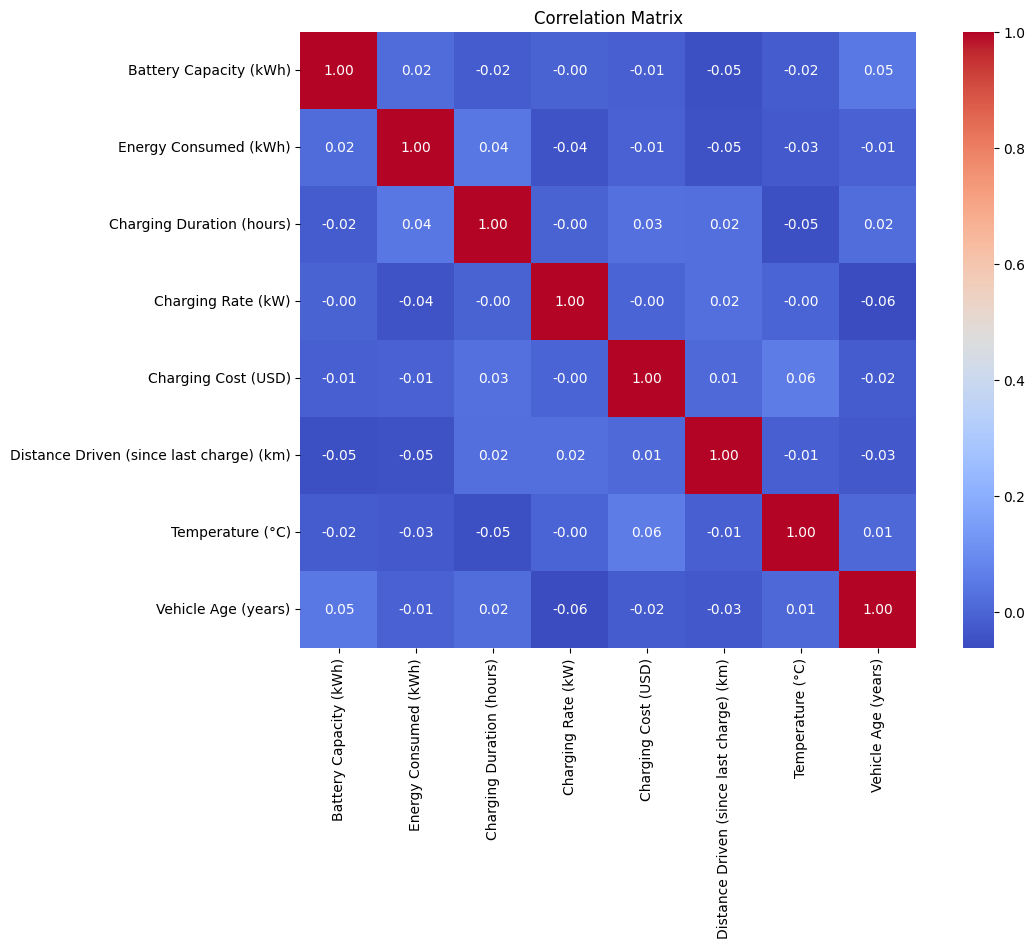

<ipython-input-78-eb88a58a147d>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Vehicle Model', y='Energy Consumed (kWh)', data=df, ci=None)


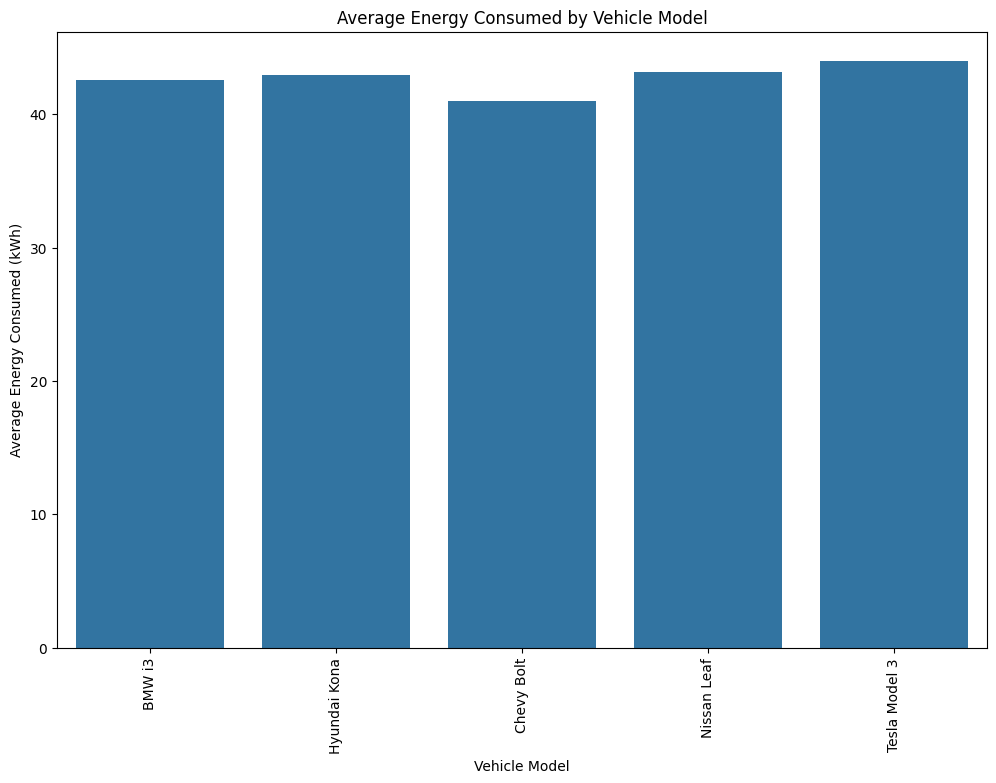

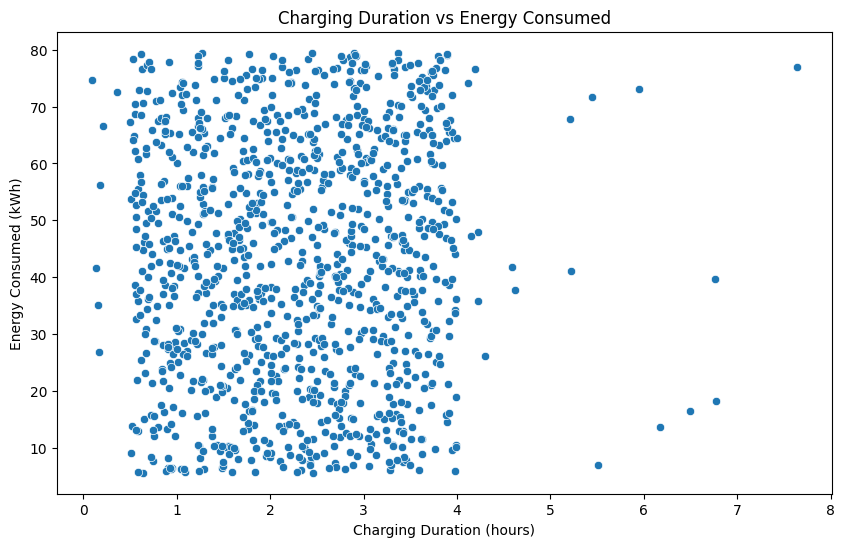

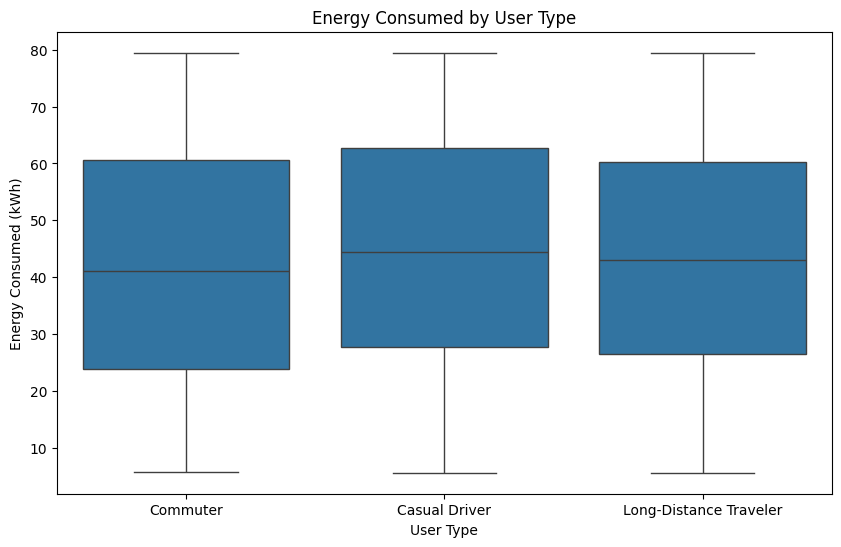

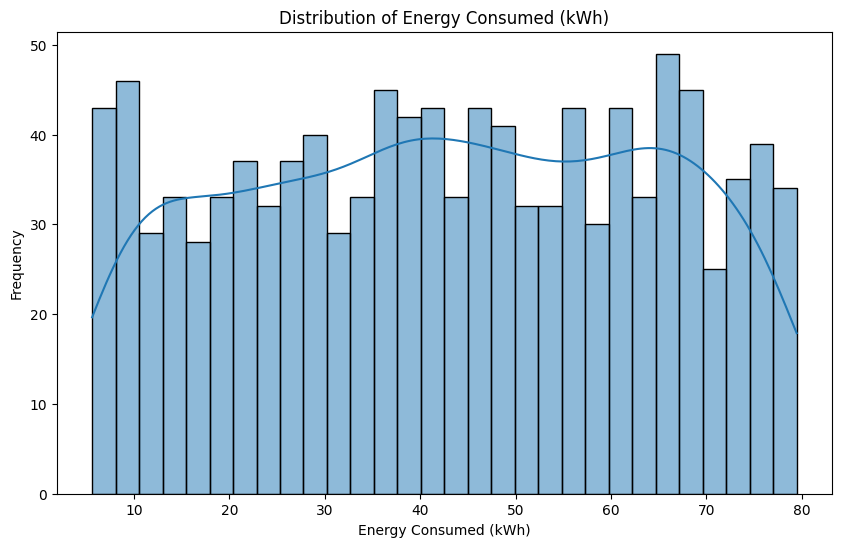

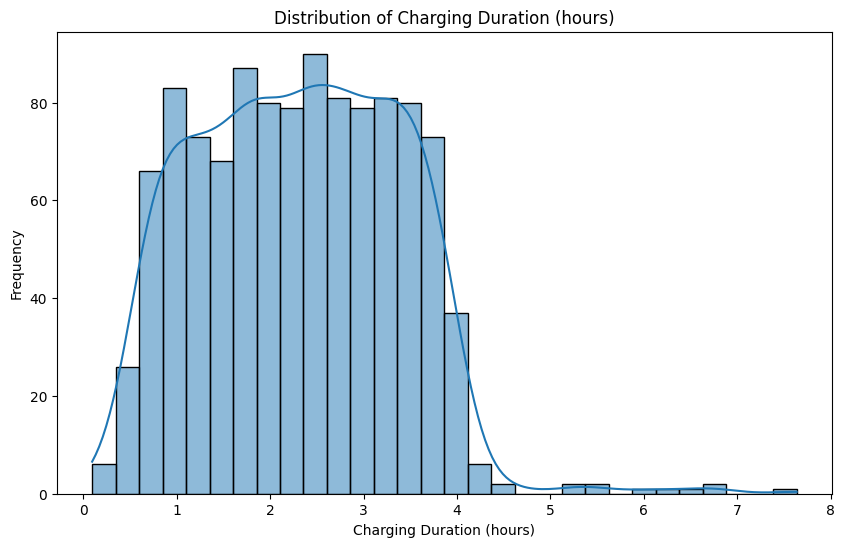

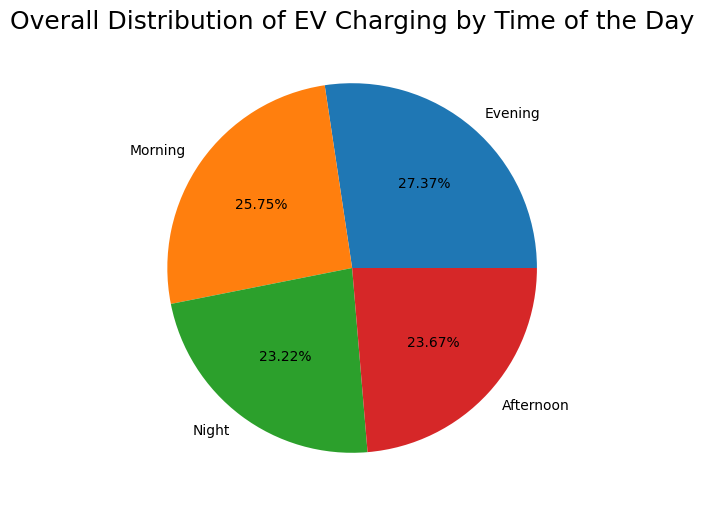

In [78]:
# Data Visualization

# Correlation heatmap
# Ensure only numeric columns are selected for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


    # Bar plot of average energy consumed by vehicle model
plt.figure(figsize=(12, 8))
sns.barplot(x='Vehicle Model', y='Energy Consumed (kWh)', data=df, ci=None)
plt.title('Average Energy Consumed by Vehicle Model')
plt.xlabel('Vehicle Model')
plt.ylabel('Average Energy Consumed (kWh)')
plt.xticks(rotation=90)
plt.show()

    # Scatter plot of charging duration vs energy consumed,
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charging Duration (hours)', y='Energy Consumed (kWh)', data=df)
plt.title('Charging Duration vs Energy Consumed')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Energy Consumed (kWh)')
plt.show()

    # Box plot of energy consumed by user type
plt.figure(figsize=(10, 6))
sns.boxplot(x='User Type', y='Energy Consumed (kWh)', data=df)
plt.title('Energy Consumed by User Type')
plt.xlabel('User Type')
plt.ylabel('Energy Consumed (kWh)')
plt.show()


# Distribution of Energy Consumed (kWh)
plt.figure(figsize=(10, 6))
sns.histplot(df['Energy Consumed (kWh)'], kde=True, bins=30)
plt.title('Distribution of Energy Consumed (kWh)')
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Charging Duration (hours)
plt.figure(figsize=(10, 6))
sns.histplot(df['Charging Duration (hours)'], kde=True, bins=30)
plt.title('Distribution of Charging Duration (hours)')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Frequency')
plt.show()

evening_counts = df[df['Time of Day']=='Evening']['Time of Day'].value_counts().values[0]
morning_counts = df[df['Time of Day']=='Morning']['Time of Day'].value_counts().values[0]
night_counts = df[df['Time of Day']=='Night']['Time of Day'].value_counts().values[0]
afternoon_counts = df[df['Time of Day']=='Afternoon']['Time of Day'].value_counts().values[0]

index_values = [evening_counts, morning_counts, night_counts, afternoon_counts]
index_labels=['Evening', 'Morning', 'Night', 'Afternoon']

plt.figure(figsize=(10,6))
plt.pie(index_values, labels =index_labels, autopct='%2.2f%%')
plt.title('Overall Distribution of EV Charging by Time of the Day', fontsize=18)

plt.show()


# Hypothesis Testing
11. Perform hypothesis testing on the dataset.
12.	Assess the performance of the dependent variable to know whether the sample is representative of the normal population by a one-sample t-test.


In [79]:
# Hypothesis Testing

# Hypothesis 1: Is the mean energy consumed significantly different from 50 kWh?
energy_consumed = df['Energy Consumed (kWh)']
t_stat, p_value = ttest_1samp(energy_consumed, 50)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Hypothesis 2: Is there a significant correlation between energy consumed and charging duration?
corr, p_value = pearsonr(df['Energy Consumed (kWh)'], df['Charging Duration (hours)'])
print(f"Pearson correlation: {corr}, P-value: {p_value}")

# Hypothesis 3: Is there a significant correlation between energy consumed and charging rate?
corr, p_value = spearmanr(df['Energy Consumed (kWh)'], df['Charging Rate (kW)'])
print(f"Spearman correlation: {corr}, P-value: {p_value}")

# Hypothesis 4: Is there a significant association between user type and charger type?
contingency_table = pd.crosstab(df['User Type'], df['Charger Type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, P-value: {p}")


## 12.	Assess the performance of the dependent variable to know whether the sample is representative of the normal population by a one-sample t-test.

# Hypothesis 5: Is the mean charging cost significantly different for different user types?
user_types = df['User Type'].unique()
for user_type in user_types:
    user_data = df[df['User Type'] == user_type]['Charging Cost (USD)']
    t_stat, p_value = ttest_1samp(user_data, df['Charging Cost (USD)'].mean())
    print(f"User Type: {user_type}, T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -11.331637520277752, P-value: 3.0788170542719278e-28
Pearson correlation: 0.0431118873584254, P-value: 0.1517299006132995
Spearman correlation: -0.03498333241602045, P-value: 0.24483243780116953
Chi-square statistic: 5.282220456398219, P-value: 0.2595459332467405
User Type: Commuter, T-statistic: 0.5117949456879509, P-value: 0.6090783725114876
User Type: Casual Driver, T-statistic: 0.25609480158752534, P-value: 0.7980352915322644
User Type: Long-Distance Traveler, T-statistic: -0.7819522880993414, P-value: 0.43474002801886513


# Regression Models
13. Build and evaluate regression models including simple linear regression and multiple linear regression.
14. Develop a script to forecast the value of the dependent variable from all the relevant independent variables using Multiple Linear Regression


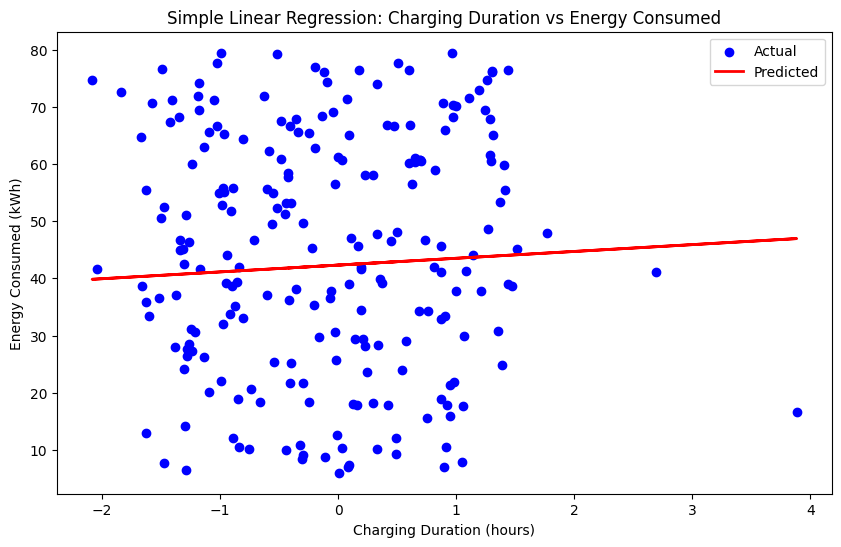

R2 Score: -0.015945539356091443


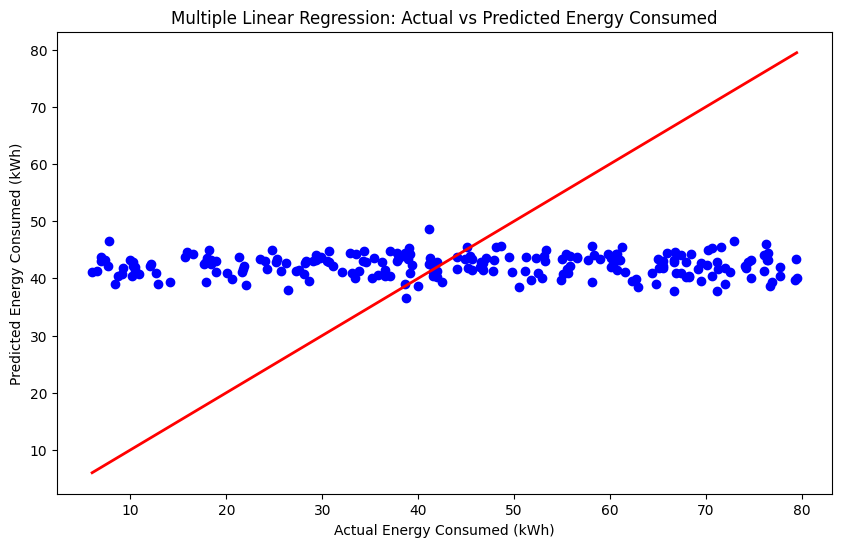

R2 Score: -0.01947839163606213


In [18]:
# Regression Models

# 13.	Build, Train, Develop and Evaluate using Simple Regression for chosen dataset.
## Preprocessing
# Selecting features and target variable for regression
X = df[['Charging Duration (hours)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']]
y = df['Energy Consumed (kWh)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Simple Linear Regression
# Using 'Charging Duration (hours)' as the single feature for simple linear regression
X_train_simple = X_train[:, 0].reshape(-1, 1)
X_test_simple = X_test[:, 0].reshape(-1, 1)

# Creating and training the simple linear regression model
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)

# Making predictions with the simple linear regression model
y_pred_simple = model_simple.predict(X_test_simple)

# Plotting the results of simple linear regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression: Charging Duration vs Energy Consumed')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Energy Consumed (kWh)')
plt.legend()
plt.show()

# Evaluating the simple linear regression model
print(f"R2 Score: {r2_score(y_test, y_pred_simple)}")



## 14. Develop a script to forecast the value of the dependent variable from all the relevant independent variables using Multiple Linear Regression

# Multiple Linear Regression
# Creating and training the multiple linear regression model
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Making predictions with the multiple linear regression model
y_pred_multiple = model_multiple.predict(X_test)

# Plotting the results of multiple linear regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multiple, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Multiple Linear Regression: Actual vs Predicted Energy Consumed')
plt.xlabel('Actual Energy Consumed (kWh)')
plt.ylabel('Predicted Energy Consumed (kWh)')
plt.show()

# Evaluating the multiple linear regression model
print(f"R2 Score: {r2_score(y_test, y_pred_multiple)}")

# Classification Models
15. Build and evaluate classification models including logistic regression, K-Nearest Neighbors (KNN), Naive Bayes, and Decision Tree.

In [ ]:
# Classification Models

## Preprocessing
# Encoding categorical variables
df['User Type'] = df['User Type'].astype('category').cat.codes
df['Charger Type'] = df['Charger Type'].astype('category').cat.codes

# Selecting features and target variable for classification
X = df[['Charging Duration (hours)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)', 'User Type', 'Charger Type']]
y = df['Energy Consumed (kWh)'] > df['Energy Consumed (kWh)'].median()  # Binary classification based on median energy consumed

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression
# Creating and training the logistic regression model
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

# Making predictions with the logistic regression model
y_pred_logistic = model_logistic.predict(X_test)

# Evaluating the logistic regression model
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logistic)}")

### K-Nearest Neighbors (KNN)
# Creating and training the KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Making predictions with the KNN model
y_pred_knn = model_knn.predict(X_test)

# Evaluating the KNN model
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")

### Naive Bayes
# Creating and training the Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Making predictions with the Naive Bayes model
y_pred_nb = model_nb.predict(X_test)

# Evaluating the Naive Bayes model
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}")

### Decision Tree
# Creating and training the Decision Tree model
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)

# Making predictions with the Decision Tree model
y_pred_tree = model_tree.predict(X_test)

# Evaluating the Decision Tree model
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree)}")

Logistic Regression Accuracy: 0.5315315315315315
KNN Accuracy: 0.5180180180180181
Naive Bayes Accuracy: 0.5405405405405406
Decision Tree Accuracy: 0.5045045045045045


16. Evaluate the performance of each model using confusion matrix and accuracy and identify the best fit classifier for the chosen dataset.
17. Predict the dependent variable by using best-fit classifier.



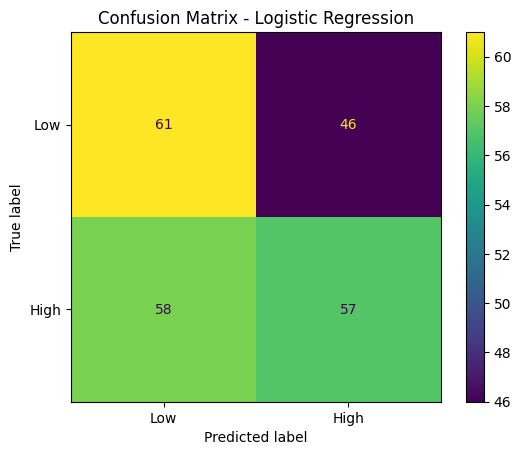

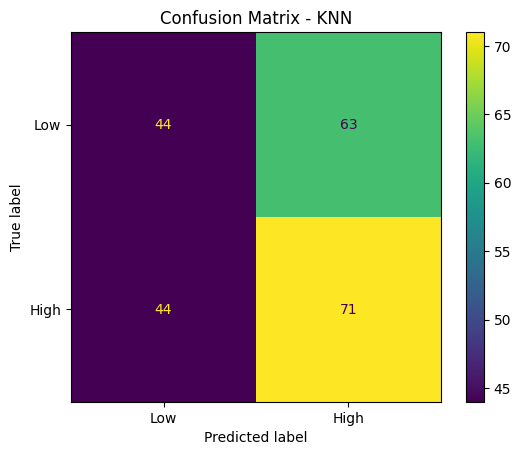

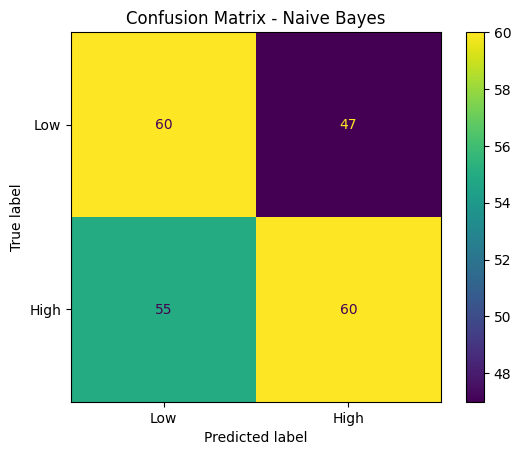

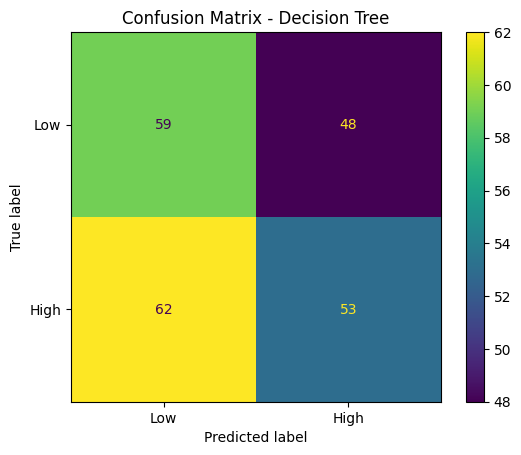

Best fit classifier: Naive Bayes with accuracy 0.54


In [81]:


# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train, predict, and evaluate models
accuracies = {}
for name, model in models.items():
    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute accuracy
    accuracies[name] = accuracy_score(y_test, y_pred)

    # Display confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Low", "High"])
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Identify and display the best model
best_model = max(accuracies, key=accuracies.get)
print(f"Best fit classifier: {best_model} with accuracy {accuracies[best_model]:.2f}")

# Clustering Models
18. Build and evaluate clustering models including K-means and hierarchical clustering.

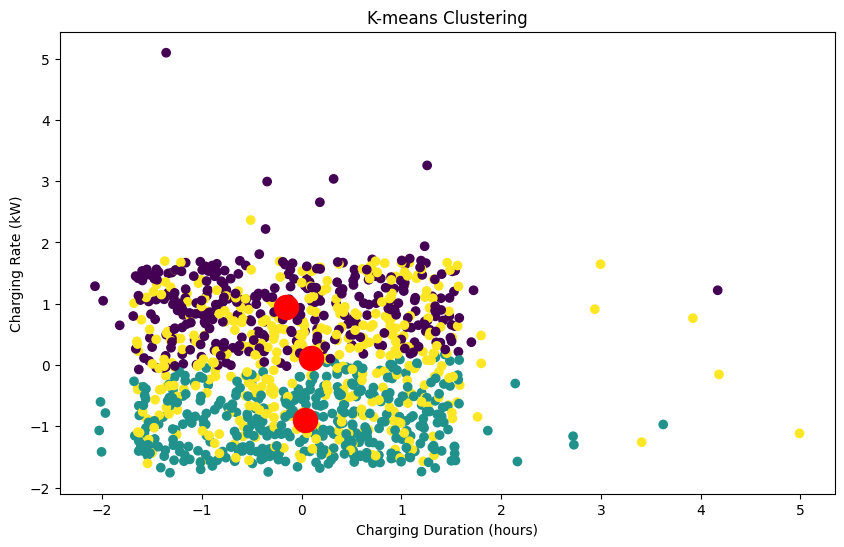

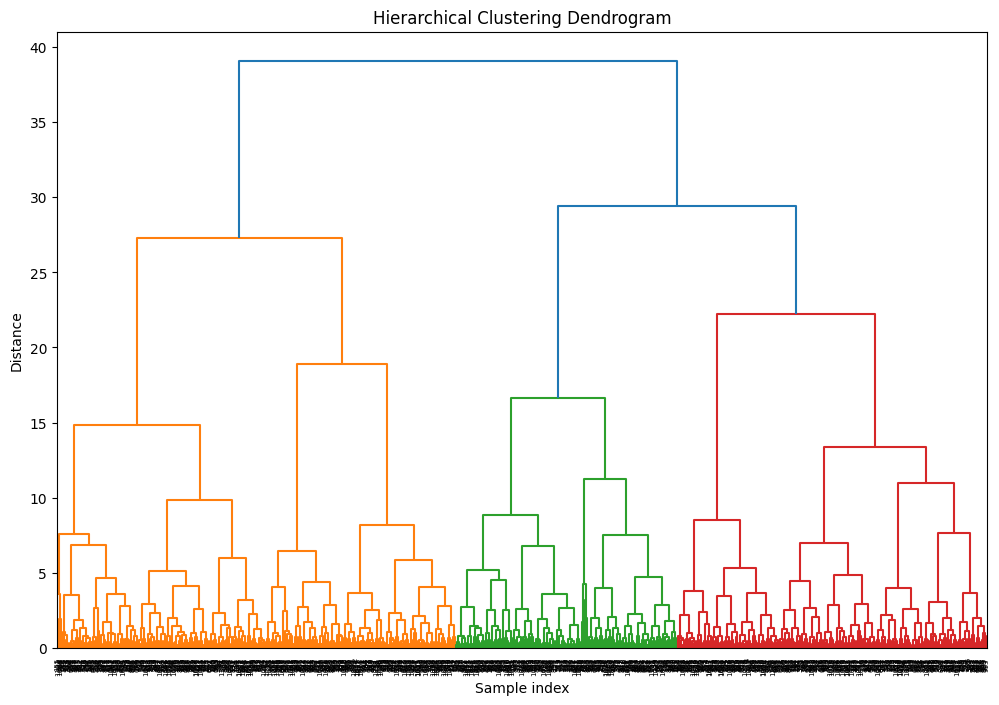

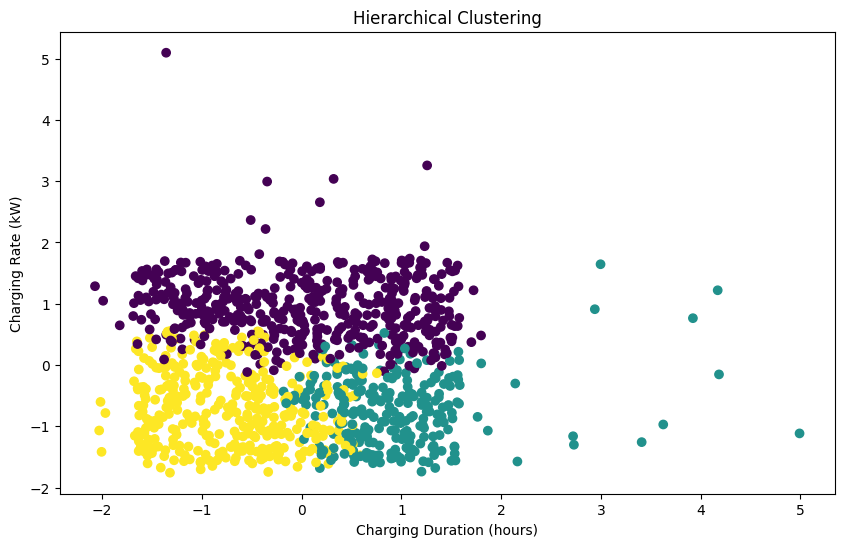

In [ ]:
# Clustering Models

## K-means
# Selecting features for clustering
X_clustering = df[['Charging Duration (hours)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']]

# Standardizing the features
sc_clustering = StandardScaler()
X_clustering = sc_clustering.fit_transform(X_clustering)

# Creating and training the K-means model
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_clustering)

# Plotting the K-means clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_clustering[:, 0], X_clustering[:, 1], c=y_kmeans, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='o', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Charging Rate (kW)')
plt.show()

## Hierarchical Clustering
# Creating the linkage matrix
Z = linkage(X_clustering, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Cutting the dendrogram to form flat clusters
from scipy.cluster.hierarchy import fcluster
y_hc = fcluster(Z, t=3, criterion='maxclust')

# Plotting the hierarchical clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_clustering[:, 0], X_clustering[:, 1], c=y_hc, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Charging Rate (kW)')
plt.show()

**19.	Explain the strategy for improving the system after viewing the cluster diagram.**


After looking at the cluster diagrams, we can find ways to make the system better. The K-means clusters show groups of users based on how long they charge and how fast the charging is. The hierarchical dendrogram shows how users are similar to each other. By looking at these groups, we can see patterns, like people who charge quickly for a short time or people who charge slowly for a long time. This helps us decide where to add more fast chargers or improve slow ones.

We can also use these groups to give users special offers. For example, people who use a lot of energy can get discounts for charging at less busy times, and people who don’t charge as much can get deals to use the chargers more often. If some points don’t fit into any group, it might mean there’s a problem, like a broken charger, and we can fix it.

These clusters can help us design better charging stations. For example, we can guess when stations will be busy or suggest the best station for a user based on their needs. By updating the clusters with new data, we can keep improving the system as more people use it. Clustering helps us understand how people use the system so we can make it work better for everyone.

# Data Versioning